In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


fileName = "KOLabels.csv"
df = pd.read_csv(fileName)


In [2]:
df2018 = df[:53]
df2019 = df[53:]

In [3]:
def knnCalc(data,n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(data[['Mean','SD']],data[['Label']])
    return knn

In [15]:
knns = {i:knnCalc(df2018,i) for i in range(3,12,2)}

c:\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d arra

In [12]:
def calcAccuracy(test,real):
    count = 0
    for i,x in enumerate(test):
        if x==real[i:i+1].values:
            count += 1
    res = count/len(real)
    return res

In [16]:
accuracy = []
predictions = []
best = 0
bestK = 0
for i,n in enumerate(knns):
    prediction = knns[n].predict(df2019[['Mean','SD']])
    predictions.append(prediction)
    
    score = calcAccuracy(prediction,df2019[['Label']])
    accuracy.append(score)
    
    if score > best:
        best = score
        bestK = i*2 + 3
    
print(accuracy)
print(best)

[0.7115384615384616, 0.6730769230769231, 0.6730769230769231, 0.7115384615384616, 0.7307692307692307]
0.7307692307692307


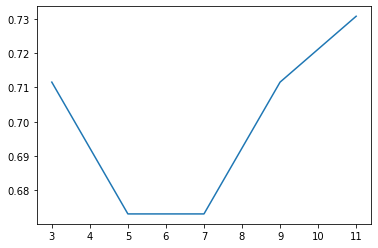

In [17]:
x = [i for i in range(3,12,2)]
plt.plot(x,accuracy)